In [1]:
import pandas as pd
import numpy as np
import types
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3f493911ebca4029ae445820ecc9b2aa = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_9MD6EilZcZPtsJvbwrV1rY-QbrjXVLHseFF91N5dNgh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_3f493911ebca4029ae445820ecc9b2aa.get_object(Bucket='businessunderstandingwithsyamsula-donotdelete-pr-kz2j3lmwofz0mz',Key='vgsales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [2]:
data.describe() 
  

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
data.shape

(16598, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Genre games paling banyak dibuat

In [5]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

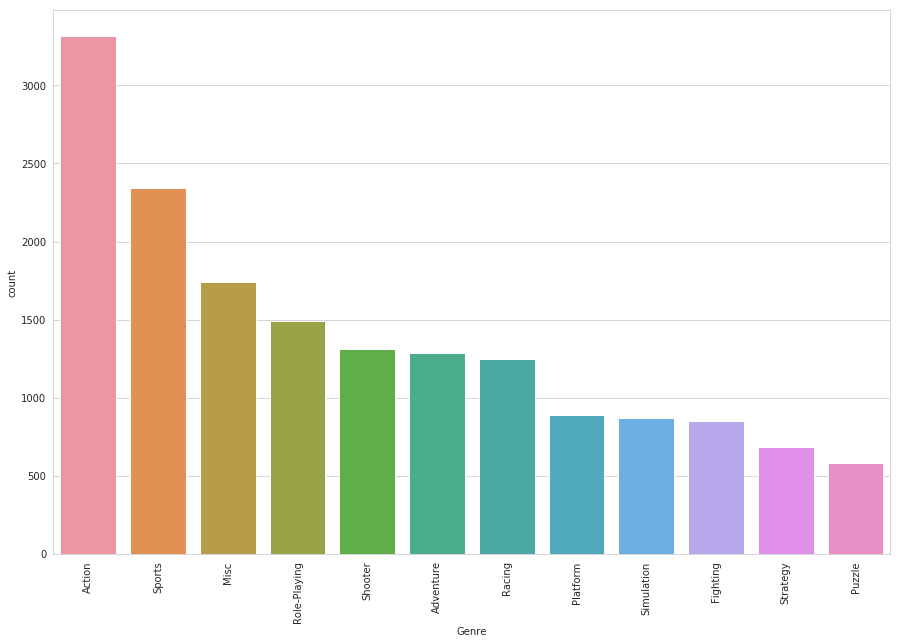

In [6]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

Tahun game paling banyak di realease?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

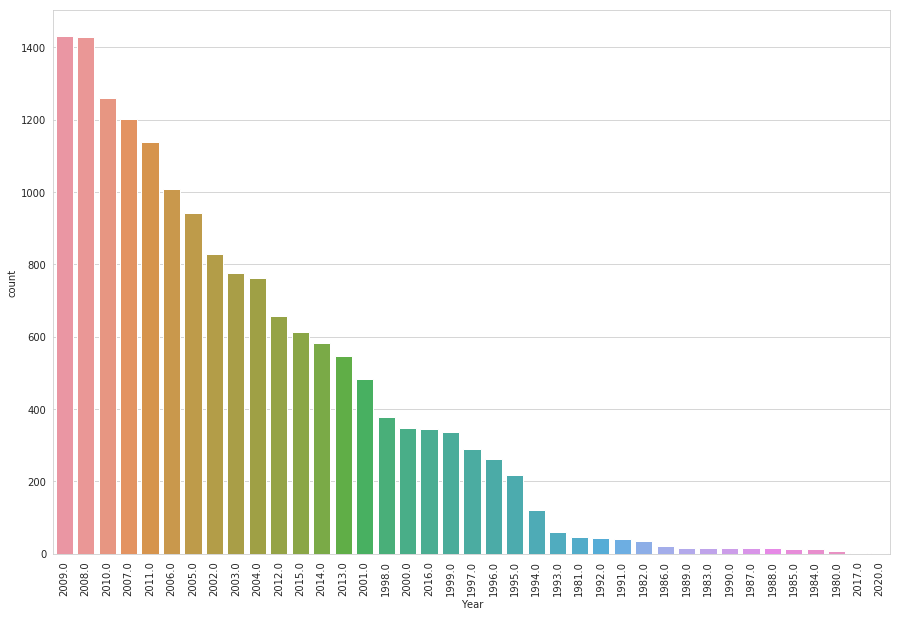

In [7]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

5 tahun teratas game realease berdasarkan genre

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

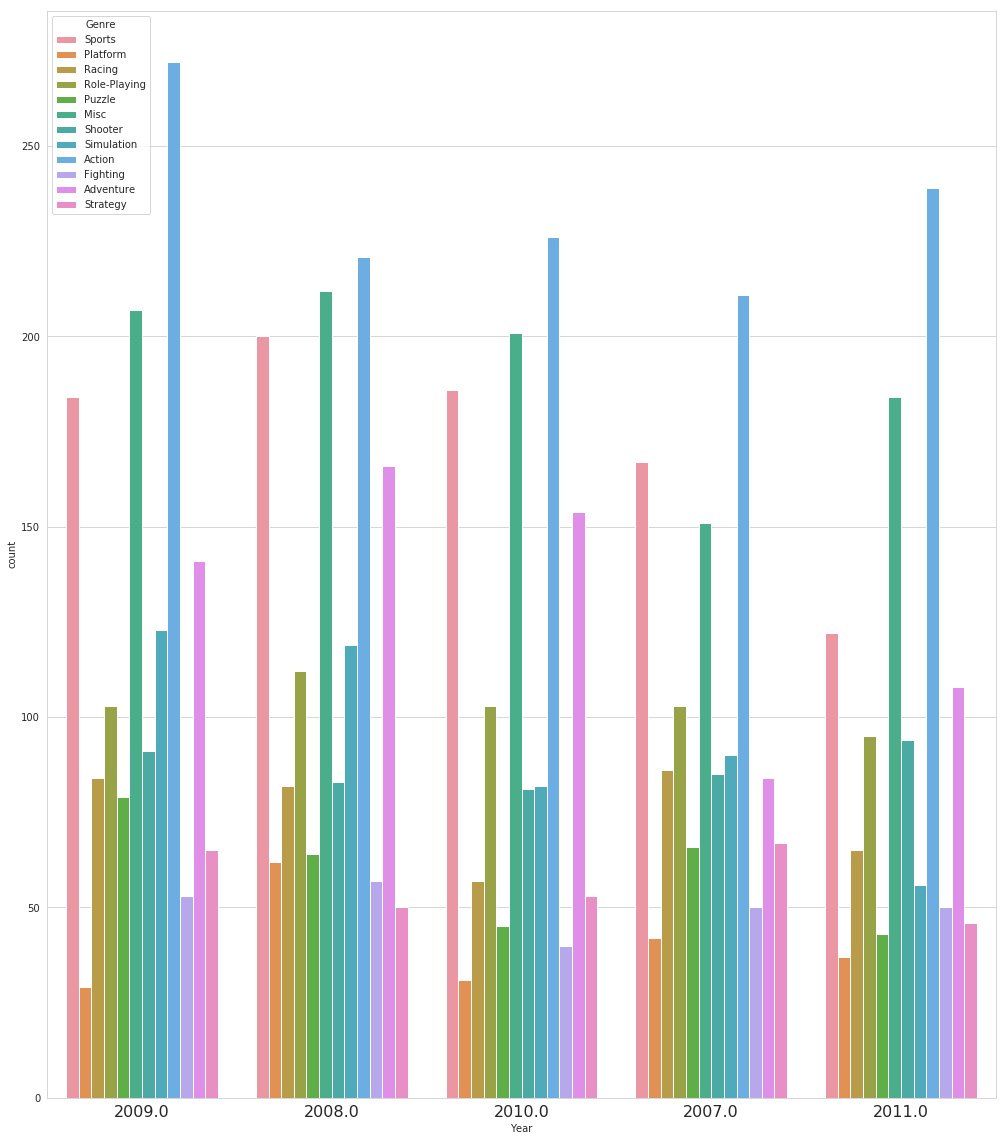

In [8]:
plt.figure(figsize=(17, 20))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=0)

Tahun dengan penjualan terbesar?

In [9]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

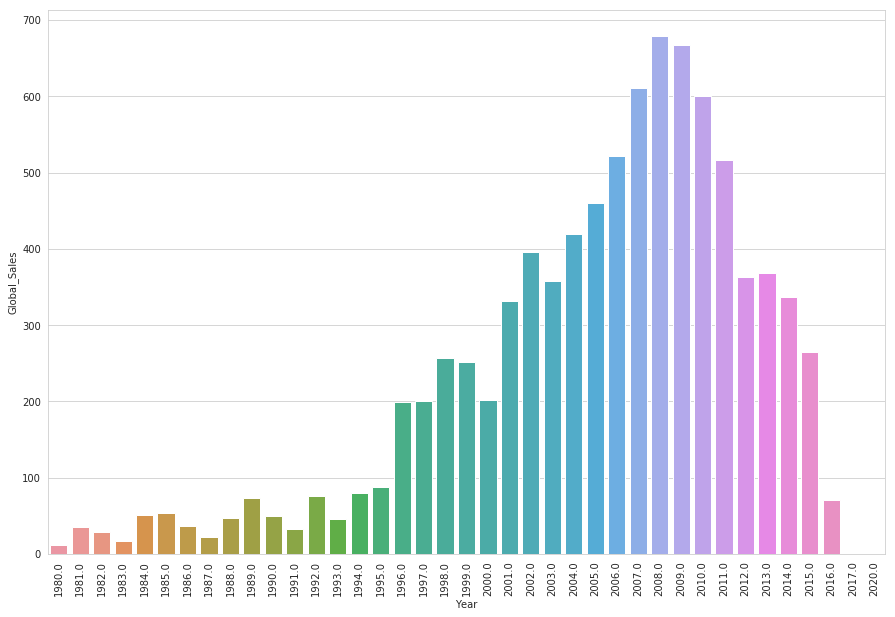

In [10]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

Platform apa yang paling laku terjual?

In [11]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

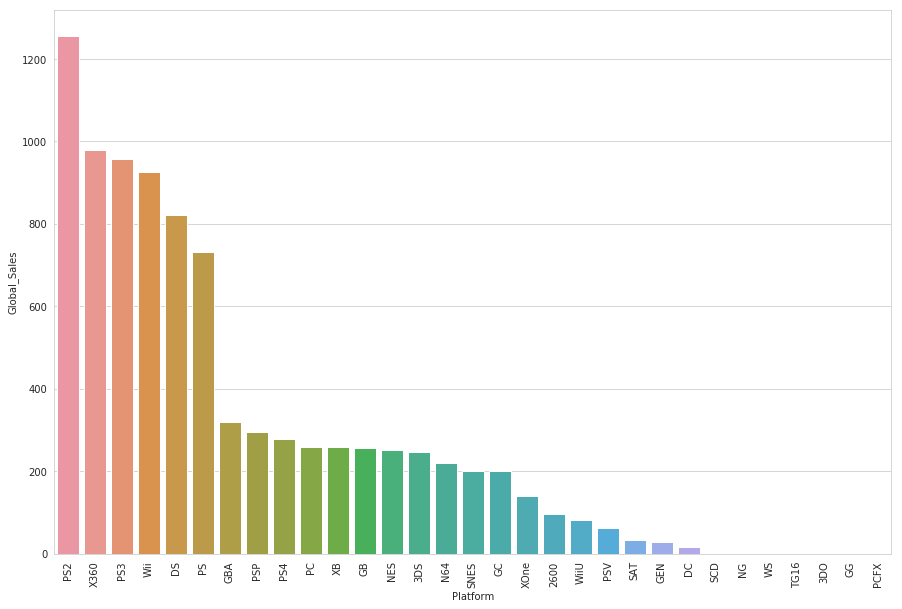

In [12]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

20 Game publisher tertinggi

In [13]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

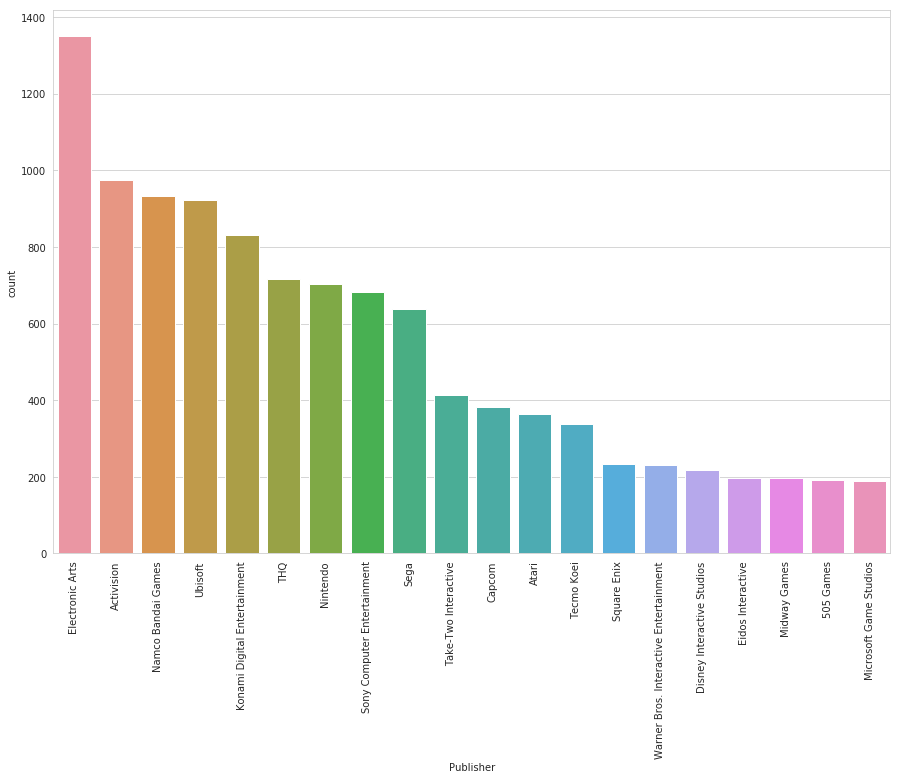

In [14]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

Pie Chart penjualan Berdasarkan lokasi

In [15]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


In [16]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x7fad6c713470>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.3051488492741687, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.16644482687681925, 0.5764513159026924, '8.9%')])

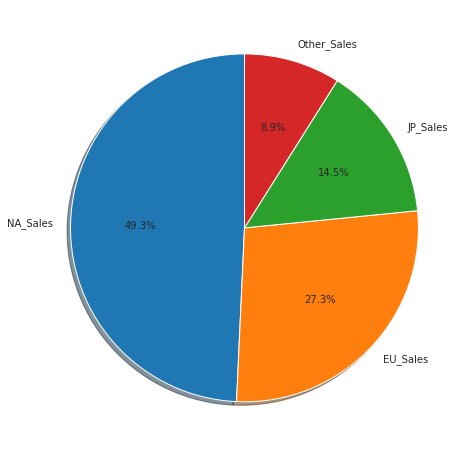

In [17]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)